In [1]:
#FileName: Loan_Model.ipynb
#Author: Kyle C Larson
#Objective

# Which variables are most significant.
# Which segment of customers should be targeted more.
# To predict whether a liability customer will buy a personal loan or not.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#chose the file to read
file_str = "Loan_Modelling.csv"
loan_data = pd.read_csv(file_str)




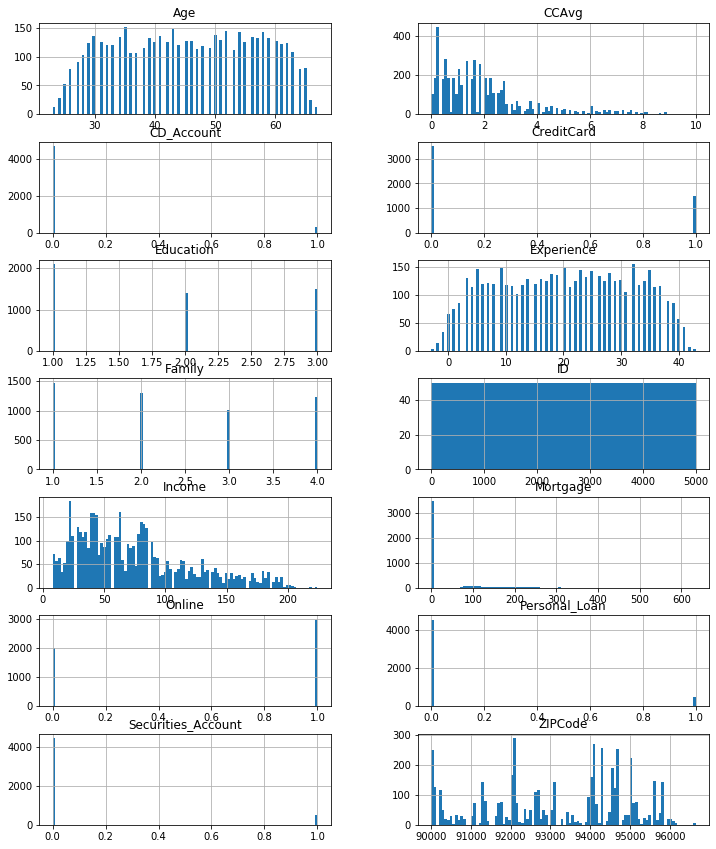

In [2]:
loan_data.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [3]:
loan_data.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [4]:
# However we want to see correlation in graphical representation so below is function for that
import numpy as np
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

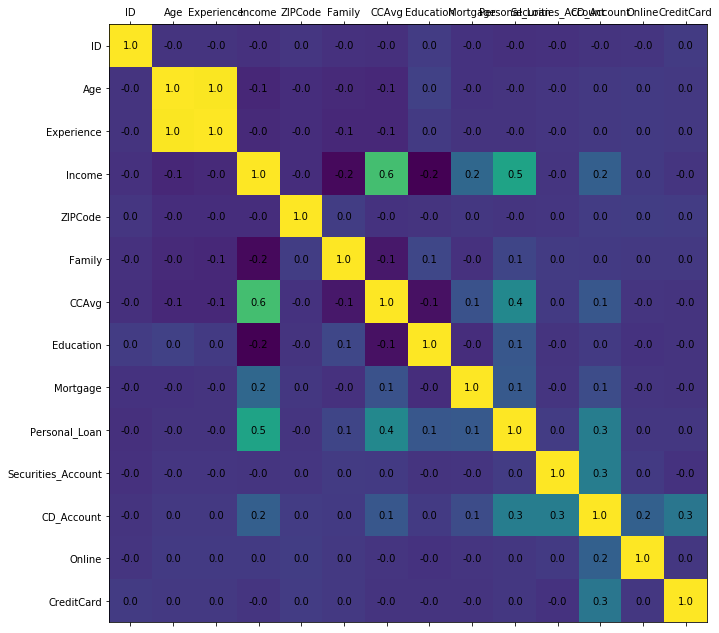

In [5]:
plot_corr(loan_data)

In [6]:
df_PLoan_y, df_PLoan_n = [x for _, x in loan_data.groupby(loan_data['Personal_Loan'] == 0)]
df_PLoan_y.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [7]:
df_PLoan_y.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [8]:
df_PLoan_n.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93170.961947,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,1759.665659,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [9]:
df_PLoan_n.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
# Two sample t-test for comparing mean
import numpy as np
import scipy.stats as st
#Lets define some useful stats quantities for analysis
def ssdev(X):
    xbar = np.mean(X)
    ssd =( sum([(x-xbar)**2 for x in X]) / (len(X)-1) )**.5
    return ssd
def tstat(xb1, xb2, ss1, ss2, n1, n2):
    SE = (ss1**2/n1 + ss2**2/n2)**.5
    ts = (xb1 - xb2)/SE
    return ts
def twos_twotail_ttest(Samp1, Samp2, sig):
    x_bar_1 = np.mean(Samp1)
    x_bar_2 = np.mean(Samp2)
    ssdev_1 = ssdev(Samp1)
    ssdev_2 = ssdev(Samp2)
#the degrees of freedom is the smaller of the two n1-1 and n2-1
    df_12 = min(len(Samp1), len(Samp2)) -1
    #print the critical values designating the ending and beginning of rejection region
    print(st.t.interval(alpha=(1-sig), df=df_12, loc=0, scale=1) )
#lastly, calculate the t-stsat
    t_AGE = tstat(x_bar_1, x_bar_2, ssdev_1, ssdev_2, len(Samp1), len(Samp2))
    print(t_AGE)

In [11]:
#Cheby shevs interval (for when the data are not normally distributed)
# at least 1-1/k**2 of the data lie within k standard deviations of the mean
def chebyshevs_interval(Samp, sig):
    x_bar = np.mean(Samp)
    ss = ssdev(Samp)
    k = (1-sig)**-.5
    upper = x_bar + k*ss
    lower = x_bar - k*ss
    return [lower, upper]

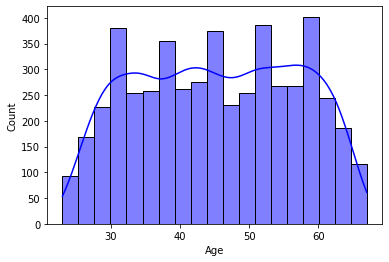

In [12]:
#Age Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(loan_data['Age'], kde=True, color='blue')

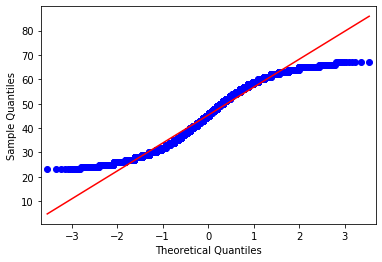

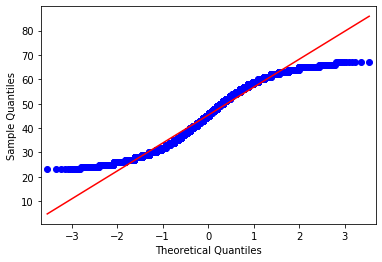

In [13]:
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(loan_data['Age']).qqplot(line='s')

In [14]:
#Ages can be assumed to be independent of one another
#H0 : mean age is the same between loan status 
#H1 : mean age is different between loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['Age'], df_PLoan_n['Age'], .05)
#because the t-stat falls inside the region, we fail to reject the null that the mean ages between
#accept and decline groups is not different

(-1.9649288589986715, 1.9649288589986715)
-0.5408324971563381


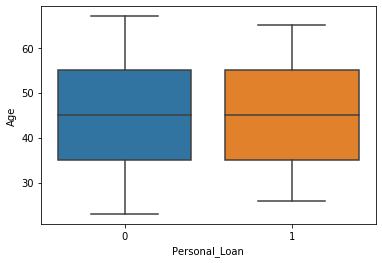

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#Age vs Personal_Loan
ax = sns.boxplot(x="Personal_Loan", 
            y="Age", 
            data=loan_data)

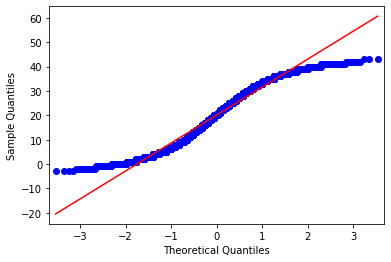

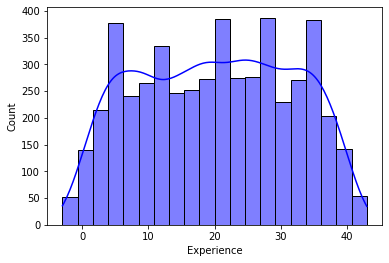

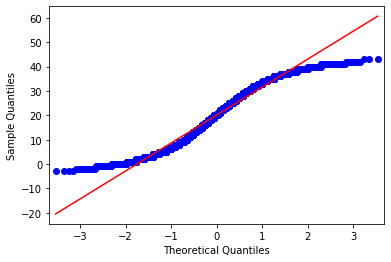

In [16]:
#Experience Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(loan_data['Experience'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(loan_data['Experience']).qqplot(line='s')

In [17]:
#Experienc can be assumed to be independent of one another
#H0 : mean exp is the same between loan status 
#H1 : mean exp is different between loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['Experience'], df_PLoan_n['Experience'], .05)
#Because the t-stat falls inside the region, we fail to reject the null that the mean exp between
#accept and decline groups is not different

(-1.9649288589986715, 1.9649288589986715)
-0.5194907327498328


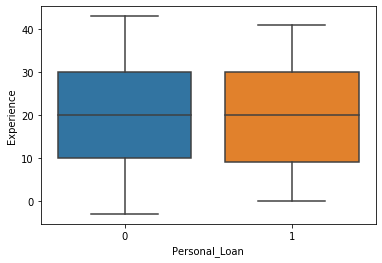

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="Experience", 
            data=loan_data)

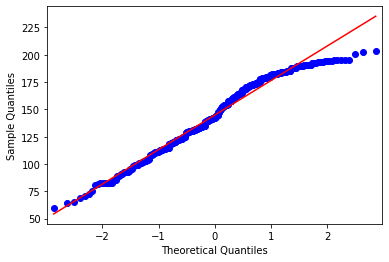

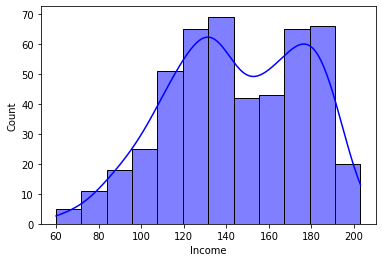

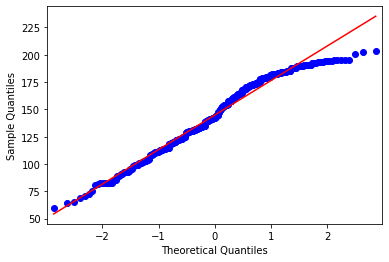

In [19]:
#Income Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(df_PLoan_y['Income'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(df_PLoan_y['Income']).qqplot(line='s')

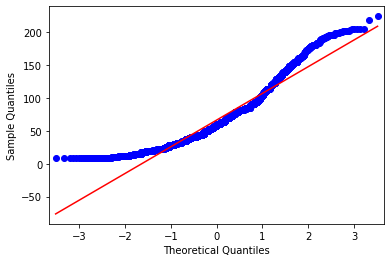

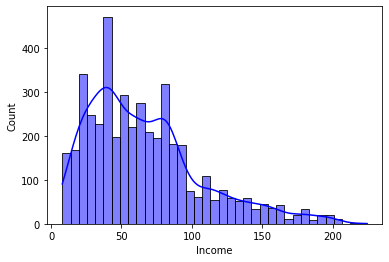

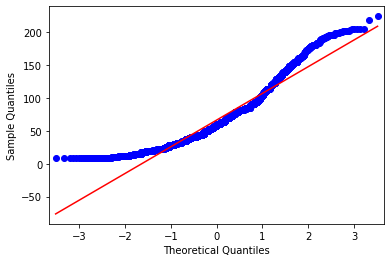

In [20]:
#Income (Failed) Normality Check (the data are not approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(df_PLoan_n['Income'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(df_PLoan_n['Income']).qqplot(line='s')

In [21]:
#Chevy Chevs
#based on the assumption the incomes are independent (which they could be if sampled randomly enough)
#if the range of Historical P Loan users falls inside the CC income interval, 
#we cannot conclude that income makes a difference
print(chebyshevs_interval(df_PLoan_y['Income'], .80))
print([min(df_PLoan_n['Income']), max(df_PLoan_n['Income'])])

[74.12090207601524, 215.37076459065145]
[8, 224]


In [22]:
#Does this hold true when outliers are removed?
#Outlier Cutoffs
#It is more useful to visualize and analyze
income_75ile = df_PLoan_n['Income'].describe()['75%']
income_25ile = df_PLoan_n['Income'].describe()['25%']
and_half_IQR = (income_75ile - income_25ile )*1.5
cutoffs = [income_25ile-and_half_IQR, income_75ile+and_half_IQR]

print("Outliers fall below:")

print(cutoffs[0])
print("Outliers extend above:")
print(cutoffs[1]) 
#the only relevant cutoff is the upper as reflected by the right skew

Outliers fall below:
-38.5
Outliers extend above:
157.5


In [23]:
#getting rid of the outliers:
outliers, PLoan_n_minus_outliers= [x for _, x in df_PLoan_n.groupby(df_PLoan_n['Income'] < cutoffs[1])]

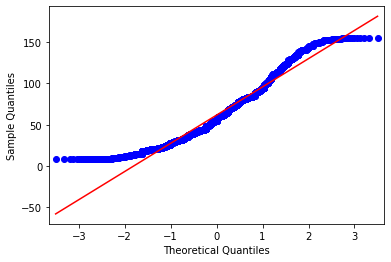

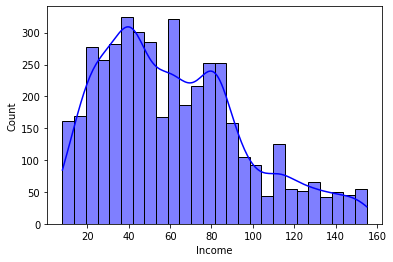

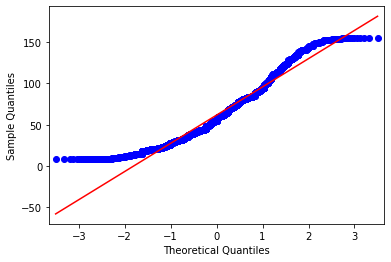

In [24]:
#rechecking normality
#Income Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(PLoan_n_minus_outliers['Income'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(PLoan_n_minus_outliers['Income']).qqplot(line='s')

In [25]:
#Income can be assumed to be roughly normal and independent of one another
#H0 : mean income is the same between historical loan status 
#H1 : mean income is different between historical loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['Income'], PLoan_n_minus_outliers['Income'], .05)
#because the t-stat falls outside the region, we reject the null that the mean exp between
#accept and decline groups is not different. There is sufficient evidence they're different.

(-1.9649288589986715, 1.9649288589986715)
54.24198448792328


In [26]:
### START HERE PERFORMING SAME STATS TESTS ###

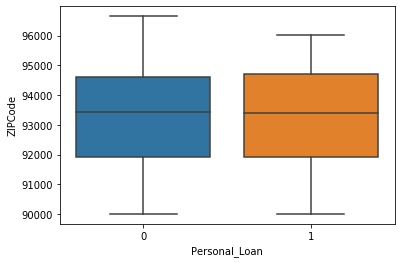

In [27]:
#even though zipcode is nominal, creating a boxplot can help identify differences
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="ZIPCode", 
            data=loan_data)

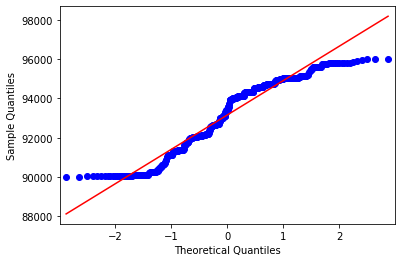

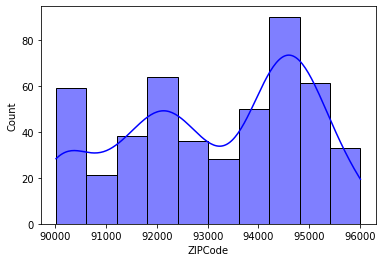

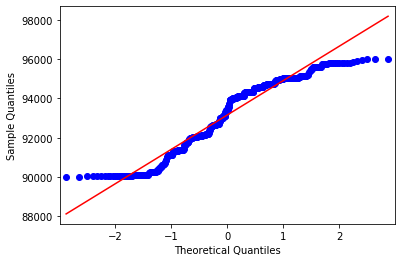

In [28]:
#Zipcode Normality Check (the data are approximately normally distributed)
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
sns.histplot(df_PLoan_y['ZIPCode'], kde=True, color='blue')
#Normality Check (the data are approximately normally distributed
# References:
# (https://www.geeksforgeeks.org/normal-probability-plot/)
import statsmodels.graphics.gofplots as sm
sm.ProbPlot(df_PLoan_y['ZIPCode']).qqplot(line='s')

In [29]:
#Zipcodes can be assumed to be roughly normal and independent of one another
#H0 : mean zipcode is the same between historical loan status 
#H1 : mean zipcode is different between historical loan status
# significance = .05
twos_twotail_ttest(df_PLoan_y['ZIPCode'], PLoan_n_minus_outliers['Income'], .05)
#because the t-stat falls outside the region, we reject the null that the mean exp between
#accept and decline groups is not different. There is sufficient evidence they're different.

(-1.9649288589986715, 1.9649288589986715)
1159.3132304977298


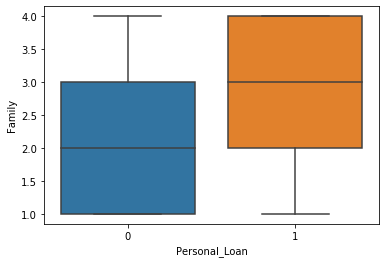

In [30]:
#Family size appears to make a difference in whether one uses personal loan, namely more family
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="Family", 
            data=loan_data)

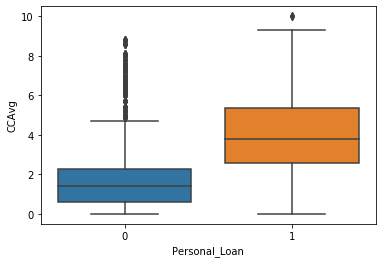

In [31]:
#CCAvg average spending on credit cards / month makes a difference but needs outlier removal
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="CCAvg", 
            data=loan_data)

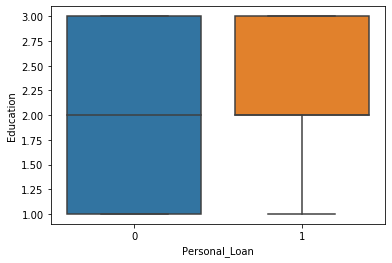

In [32]:
#Education Matters
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="Education", 
            data=loan_data)

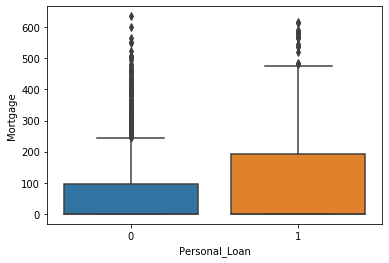

In [33]:
#Mortgage deffinitel matters but needs outlier removal
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="Mortgage", 
            data=loan_data)

In [34]:
#morgage is a factor
twos_twotail_ttest(df_PLoan_y['Mortgage'], df_PLoan_n['Mortgage'], .05)

(-1.9649288589986715, 1.9649288589986715)
6.568699202865151


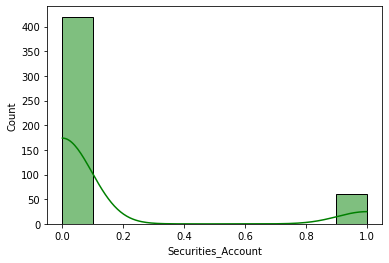

In [35]:
#Securities does not appear to matter, but this would be a 2 prop z test to know for sure
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_PLoan_y['Securities_Account'], kde=True, color='green')

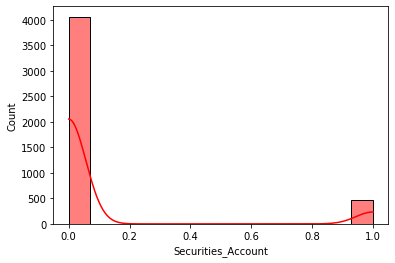

In [36]:
sns.histplot(df_PLoan_n['Securities_Account'], kde=True, color='red')

In [37]:
#by nqp>10 it is safe to use the normal approximation for binomial distribution
#H0 : the proportions are the same
#H1 : the proportions are different
import scipy.stats as st
n1 = len(df_PLoan_n['Securities_Account'])
x1 = sum(df_PLoan_n['Securities_Account'])
n2 = len(df_PLoan_y['Securities_Account'])
x2 = sum(df_PLoan_y['Securities_Account'])
p1 = x1/n1
p2 = x2/n2
p = (x1+x2)/(n1+n2)
SE = (p*(1-p)*(1/n1+1/n2))**.5
Z = (p1-p2)/SE
print("Critical Values: +/-")
print(st.norm.ppf(.975))
print("Zstat: "+ str(Z))
#because the statistic is inside the critical values, we fail to reject the Null that the proportions 
#are the same

Critical Values: +/-
1.959963984540054
Zstat: -1.5523738988524551


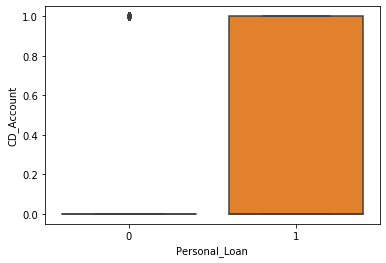

In [38]:
#CD account, does the customer have a certificate of deposit with the bank
#this appears to matter based on the below plot
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="CD_Account", 
            data=loan_data)

In [39]:
#by nqp>10 it is safe to use the normal approximation for binomial distribution
#H0 : the proportions are the same
#H1 : the proportions are different
import scipy.stats as st
n1 = len(df_PLoan_n['CD_Account'])
x1 = sum(df_PLoan_n['CD_Account'])
n2 = len(df_PLoan_y['CD_Account'])
x2 = sum(df_PLoan_y['CD_Account'])
p1 = x1/n1
p2 = x2/n2
p = (x1+x2)/(n1+n2)
SE = (p*(1-p)*(1/n1+1/n2))**.5
Z = (p1-p2)/SE
print("Critical Values: +/-")
print(st.norm.ppf(.975))
print("Zstat: "+ str(Z))
#because the statistic is inside the critical values, we fail to reject the Null that the proportions 
#are the same

Critical Values: +/-
1.959963984540054
Zstat: -22.36966451400381


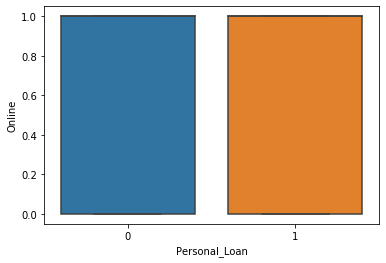

In [40]:
#Does the customer use internet banking facilities (This doesn't appear to matter)
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="Online", 
            data=loan_data)

In [41]:
#by nqp>10 it is safe to use the normal approximation for binomial distribution
#H0 : the proportions are the same
#H1 : the proportions are different
import scipy.stats as st
n1 = len(df_PLoan_n['Online'])
x1 = sum(df_PLoan_n['Online'])
n2 = len(df_PLoan_y['Online'])
x2 = sum(df_PLoan_y['Online'])
p1 = x1/n1
p2 = x2/n2
p = (x1+x2)/(n1+n2)
SE = (p*(1-p)*(1/n1+1/n2))**.5
Z = (p1-p2)/SE
print("Critical Values: +/-")
print(st.norm.ppf(.975))
print("Zstat: "+ str(Z))
#because the statistic is inside the critical values, we fail to reject the Null that the proportions 
#are the same

Critical Values: +/-
1.959963984540054
Zstat: -0.443908583808537


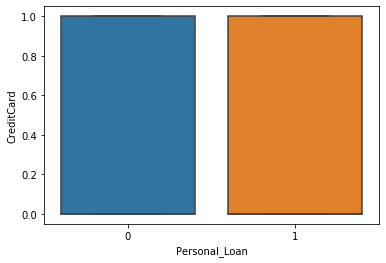

In [42]:
#CreditCard, does the customer have a CC issued by universal bank (this doesn't appear to matter)
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="Personal_Loan", 
            y="CreditCard", 
            data=loan_data)

In [43]:
#by nqp>10 it is safe to use the normal approximation for binomial distribution
#H0 : the proportions are the same
#H1 : the proportions are different
# two tailed at alpha = .05
import scipy.stats as st
n1 = len(df_PLoan_n['CreditCard'])
x1 = sum(df_PLoan_n['CreditCard'])
n2 = len(df_PLoan_y['CreditCard'])
x2 = sum(df_PLoan_y['CreditCard'])
p1 = x1/n1
p2 = x2/n2
p = (x1+x2)/(n1+n2)
SE = (p*(1-p)*(1/n1+1/n2))**.5
Z = (p1-p2)/SE
print("Critical Values: +/-")
print(st.norm.ppf(.975))
print("Zstat: "+ str(Z))
#because the statistic is inside the critical values, we fail to reject the Null that the proportions 
#are the same

Critical Values: +/-
1.959963984540054
Zstat: -0.19809658994183046


In [44]:
#As Per the Above the following will actually feed the model
PLoan_features = ["Income","ZIPCode","Family","CCAvg","Education","Mortgage","CD_Account"]
#So we select the data and start cleaning
X = loan_data[PLoan_features]
#first look for missing values, there are none!
missing_loan_vals_count = X.isnull().sum()
missing_loan_vals_count[0:10]

Income        0
ZIPCode       0
Family        0
CCAvg         0
Education     0
Mortgage      0
CD_Account    0
dtype: int64

In [45]:
y = loan_data["Personal_Loan"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [46]:
#Now to build the decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#split into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
#Define model.
loan_model=DecisionTreeRegressor(random_state=1)
#Fit model
loan_model.fit(train_X, train_y)
#validate
val_predictions = loan_model.predict(val_X)
#Mean Absolute Error
print("Mean Absolute Error:")
print(mean_absolute_error(val_y, val_predictions))
#the units of this, are the proportion of correct guesses to incorrect guesses
#2% of the time the model guesses incorrecly whether someone will sign up for the personal loan

Mean Absolute Error:
0.02


In [47]:
# Cross Validation using piplining to randomly split the training and test data

In [48]:
# We could calculate the Root Mean Squared Error (that is the spread of the residual of the model)
#standard deviation of the residuals for comparison
from statistics import stdev
print("Standard Deviation of the Residuals of Approach:")
resid =np.subtract(val_predictions, val_y)
stdev_resid = stdev(val_predictions)
print(stdev_resid)

Standard Deviation of the Residuals of Approach:
0.28224083317324633


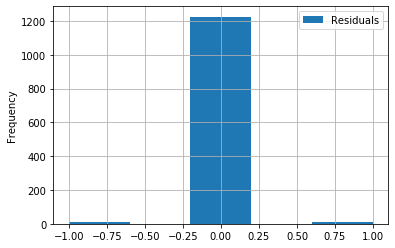

In [49]:
import matplotlib.pyplot as plt
resid_data = pd.DataFrame({"Residuals":resid})
resid_data.plot.hist(grid=True, bins=5)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
#Using similar Decision Tree from the Tree sublibray of Sk Learn
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
#same as before
dTree.fit(train_X, train_y)
dTreePreds = dTree.predict(val_X)
accuracy = accuracy_score(val_y, dTreePreds)
# Accuracy seems to be 1 - Mean Absolute Error which was 0.02
print("Accuracy:"+str(accuracy))

Accuracy:0.98


In [59]:
#The accuracy of the previous model from the root of sklearn (run first above)
print("Accuracy:"+str(accuracy_score(val_y, val_predictions)))

Accuracy:0.98


In [52]:
#VISUALIZING THE DECISION TREE
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD_Account']


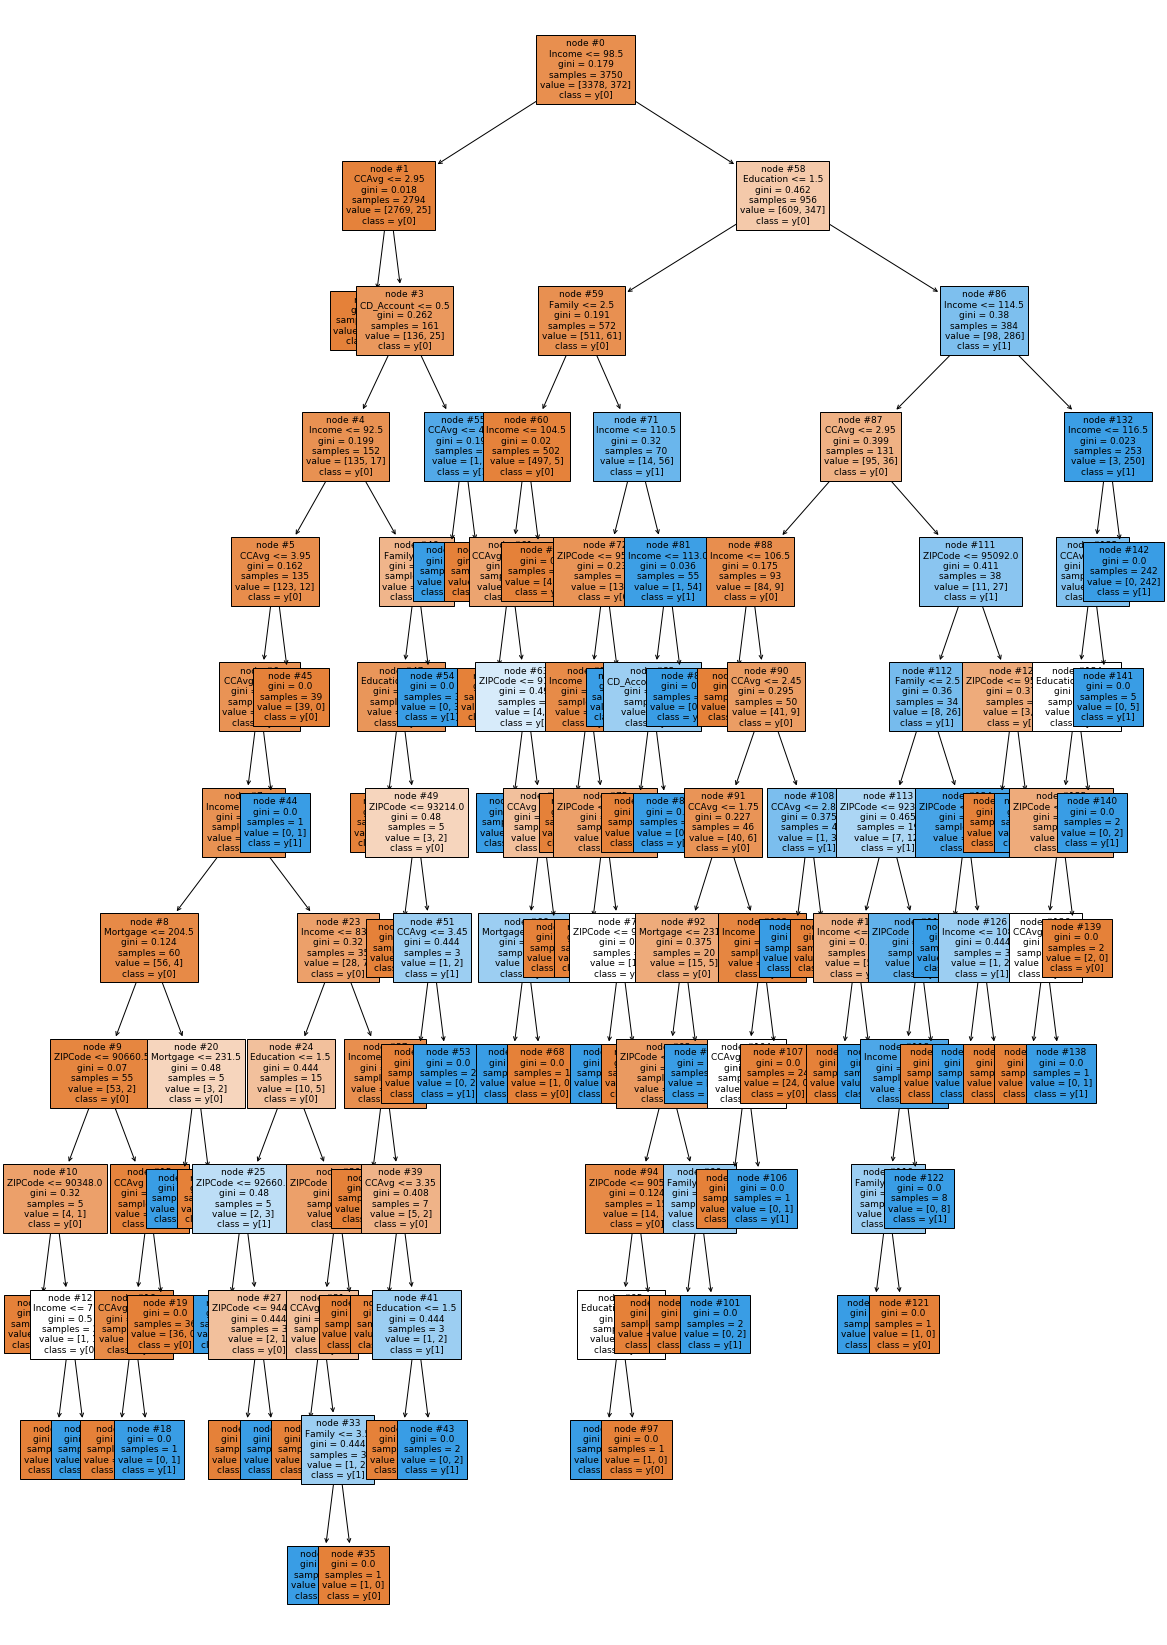

In [61]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

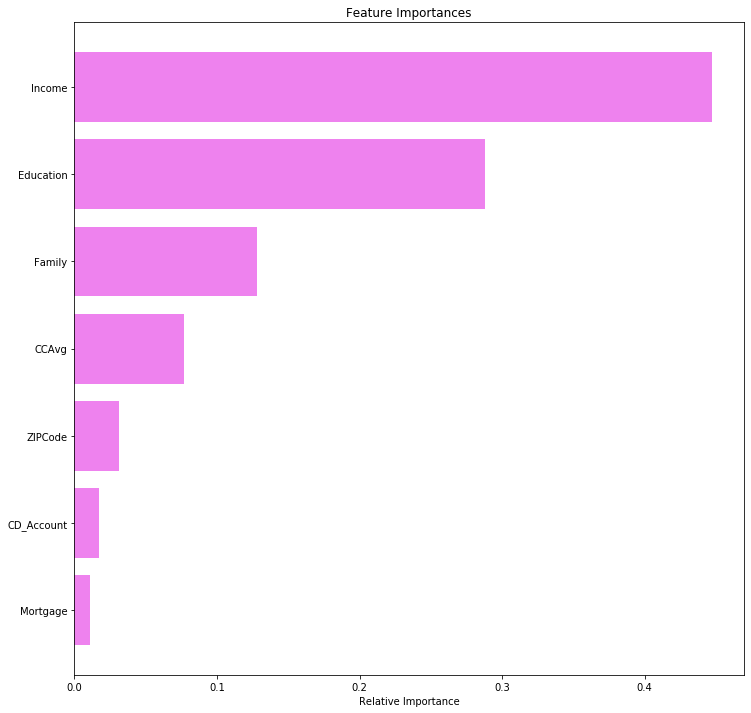

In [62]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#ATTEMPTING TO IMPROVE MODEL

In [66]:
#HYPER PARAMETER TUNING
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(train_X, train_y)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [74]:
hyperpreds = estimator.predict(val_X)
accuracy = accuracy_score(val_y, hyperpreds)
# There Seems to be a small improvement from HYPER 
print("Accuracy:"+str(accuracy))

Accuracy:0.9808


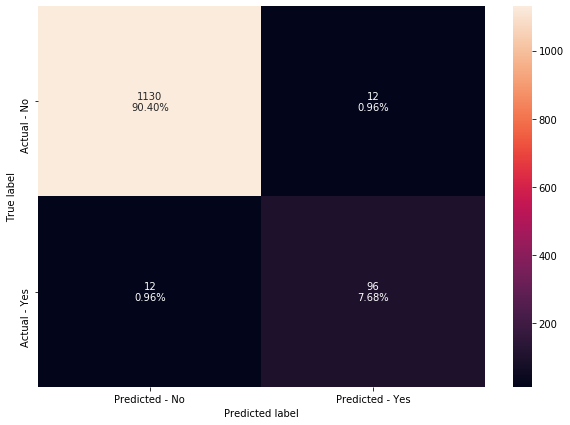

In [76]:
## Function to create confusion matrix
def make_confusion_matrix(preds, model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(val_X)
    cm=metrics.confusion_matrix( y_actual, preds, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
make_confusion_matrix(hyperpreds,estimator, val_y)

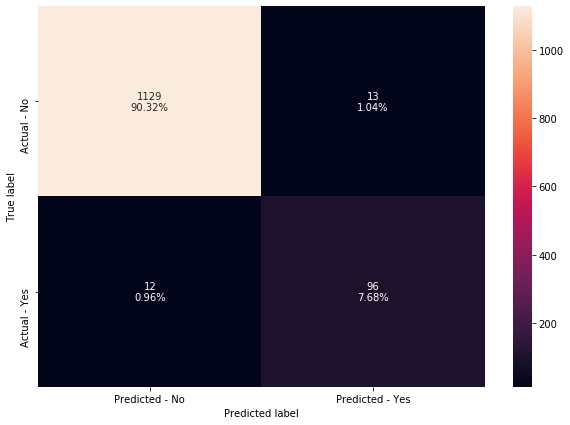

In [77]:
make_confusion_matrix(dTreePreds,dTree, val_y)

In [ ]:
#SO HYPER PARAMETERS SLIGHTLY IMPROVE THE MODEL

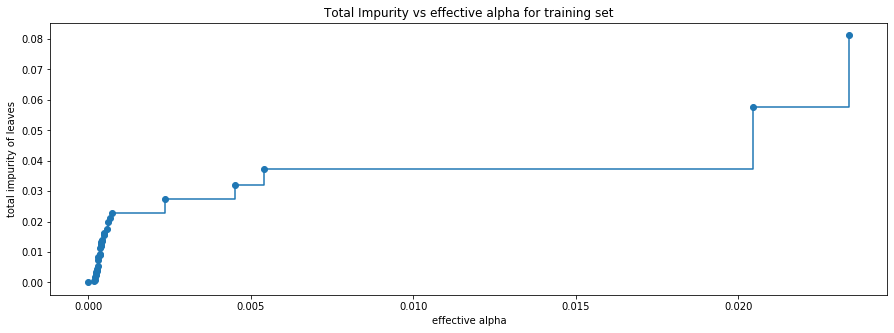

In [78]:
#TRY PRUNING THE TREE
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [79]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(train_X, train_y)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04875652134696449


In [83]:
clfPred = clf.predict(val_X)
accuracy = accuracy_score(val_y, clfPred)
# There Seems to be no improvement from Pruning
print("Accuracy:"+str(accuracy))

Accuracy:0.9136


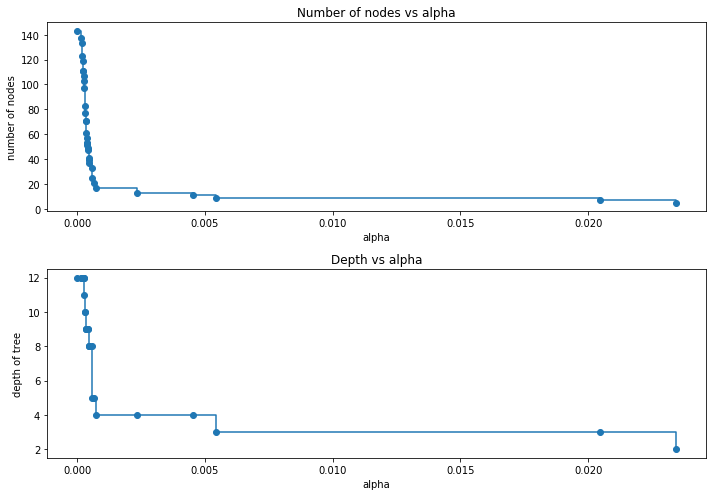

In [80]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [85]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(train_X)
    values_train=metrics.recall_score(train_y,pred_train3)
    recall_train.append(values_train)
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(val_X)
    values_test=metrics.recall_score(val_y,pred_test3)
    recall_test.append(values_test)

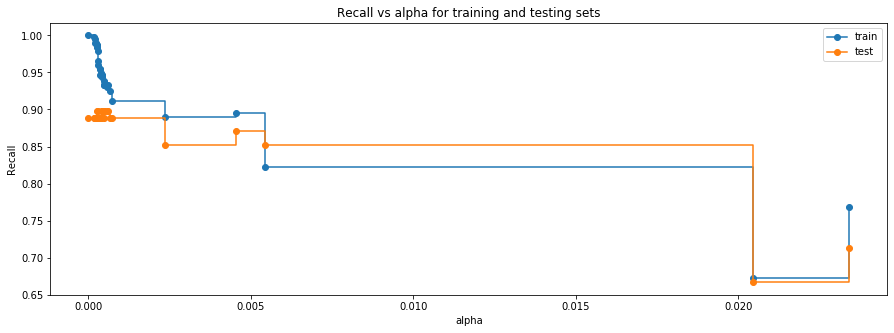

In [86]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00026181818181818175, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


In [89]:
clfBMPred = best_model.predict(val_X)
accuracy = accuracy_score(val_y, clfBMPred)
# There still seems to be no improvement from Pruning and themodel isnt much more simple
print("Accuracy:"+str(accuracy))

Accuracy:0.9784


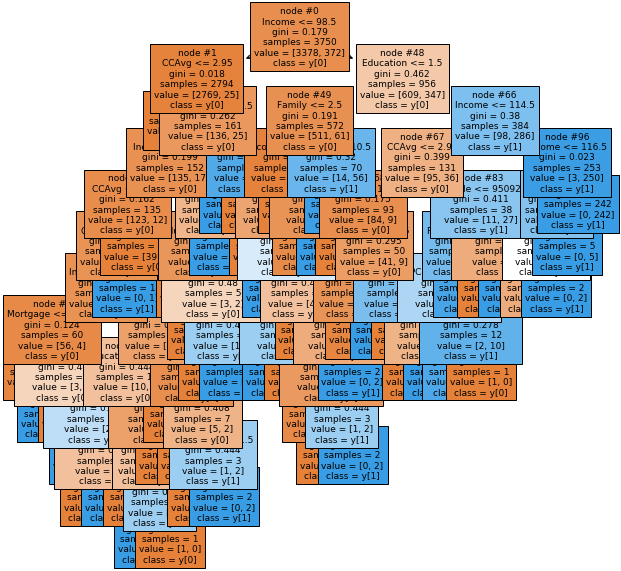

In [90]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

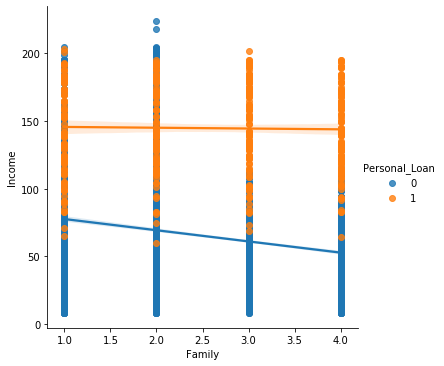

In [53]:
#Additional Visualizations
#plot
#1 encoding represents the predicted prices from the linear model
sns.lmplot(x="Family", y="Income", hue="Personal_Loan", data=loan_data)

In [54]:
#Appendix Check Correlations by calculating the correlation coefficient
def cov(X, Y):
    xbar = np.mean(X)
    ybar = np.mean(Y)
    xdifs = [(x-xbar) for x in X]
    ydifs = [(y-ybar) for y in Y]
    c = sum(np.multiply(xdifs, ydifs))
    return c
def ss(THETA):
    THETAbar = np.mean(THETA)
    THETAdifsq = [(t-THETAbar)**2 for t in THETA]
    return sum(THETAdifsq)

covariance = cov(df_PLoan_n['Family'],df_PLoan_n['Income'])
print("Covariance:"+str(covariance))
correl = covariance / ( ss(df_PLoan_n['Family'])*ss(df_PLoan_n['Income']) )
print("Correlation Coefficient:"+str(correl))
#in this case family and income are very weakly negatively correlated

Covariance:-49387.71327433623
Correlation Coefficient:-1.1129465937584686e-06


In [55]:
#Graph Plot